In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
# GPU vs CPU vs TPU

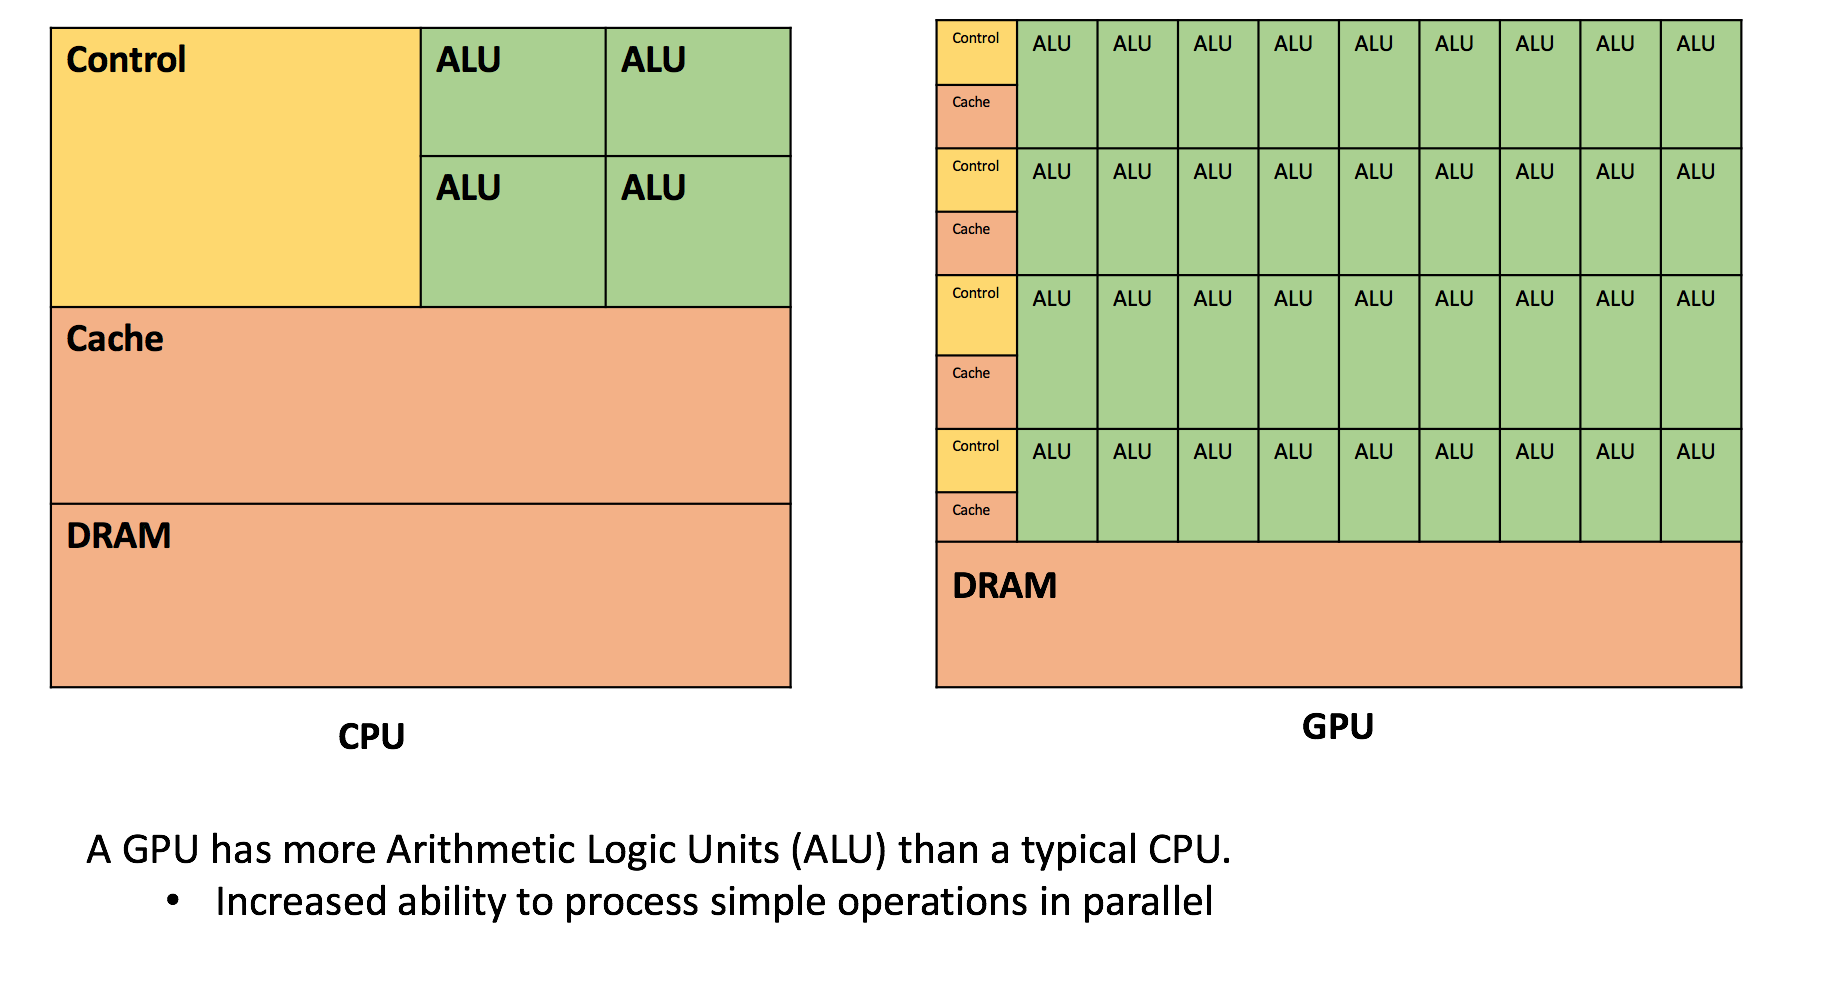

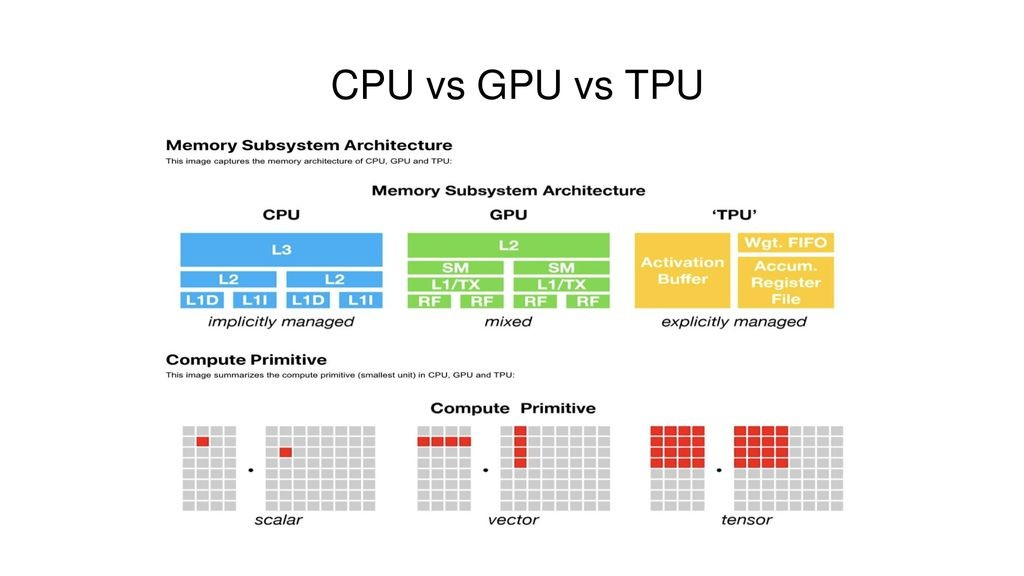

In [4]:
# GPU : It is used to design graphics and excel parallel processing and ai workloads
# CPU : It is General purpose processor used for simple task everyday
# TPU : It is Developed by Google it is specifically optimized for macine learning, deep learning competition, Particularly tensor operations offering potential speed and efficiency advantage on neural networks

In [5]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
tf.config.list_physical_devices("TPU")

[]

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
# Load DAta set

In [10]:
# Before Training model we split training and test data
# In training data we split some amount of data as validation data For the model to check on the unseen train data set

In [11]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
print("Data type of X_train :",X_train_full.dtype)
X_train_full.shape

Data type of X_train : uint8


(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
y_train_full.shape

(60000,)

In [15]:
y_test.shape

(10000,)

In [16]:
# X_validate will be last 5000 data for the Training data set
# X_train Will be the starting first 5000 data from the Training data set
# same for y_validate and y_train

In [17]:
X_valid, X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [18]:
X_test = X_test/255.0

In [19]:
X_train.shape

(55000, 28, 28)

In [20]:
X_valid.shape

(5000, 28, 28)

In [21]:
# Total  = 70000
# Training = 60000
   # In Training - X_train = 55000 and X_validate = 5000
# testing = 10000
# validation = 5000


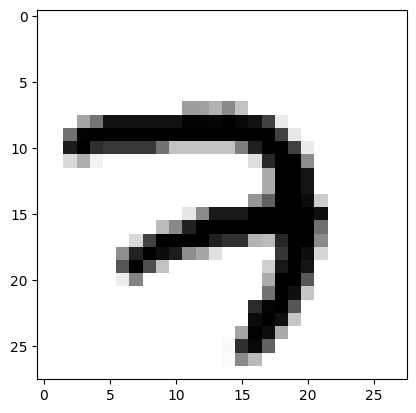

In [22]:
# Lets view some data
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

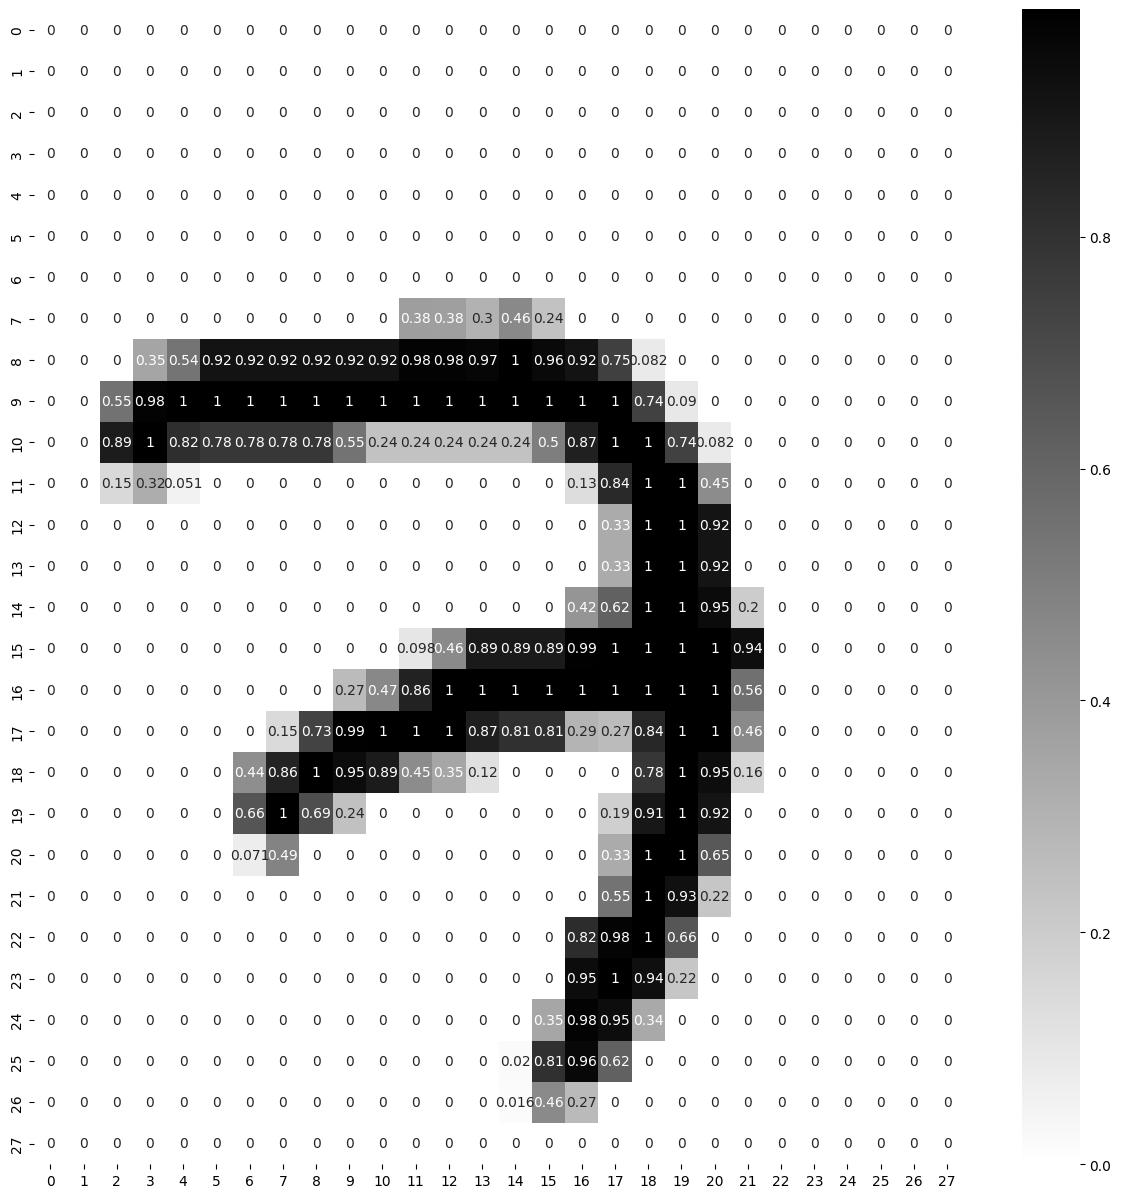

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [24]:
# Ceating Network Layers with neurons

In [25]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [27]:
# First layer is flattened layer where the data is flattened from 2D to 1D
# Second layer is hidden layer where we contain neurons with added Weights and Bias
# 3rd layer is also hidden layer which receives the input from second layer and add weights and bias
# 4th layer is output layer which receives the data from 3rd layer and shows

In [28]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Parameter Count for Each Layer in a Fully Connected Neural Network
print("First layer * second layer + bias:", 784 * 300 + 300)
print("Second layer * third layer + bias:", 300 * 100 + 100)
print("Third layer * output layer + bias:", 100 * 10 + 10)

First layer * second layer + bias: 235500
Second layer * third layer + bias: 30100
Third layer * output layer + bias: 1010


In [30]:
# Total parameter
sum((235500,30100,1010))

266610

In [31]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [32]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [33]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [34]:
#Callback Functions

In [35]:
# 1.Tensorboard Callback Functions

In [36]:
# logging
import time
def get_log_path(log_dir="logs/fit"):
  filename = time.strftime("Log_%Y_%m_%d_%H_%M_%S")
  log_path = os.path.join(log_dir,filename)
  print(f"saving logs at {log_path}")
  return log_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)


saving logs at logs/fit/Log_2025_07_24_17_50_33


In [37]:
# 2.Early Stopping Callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)


In [38]:
# 3. Model checkpointing Callback
ckpt_path = "Model_ckpt.keras" # Changed to .keras format
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(ckpt_path,save_best_only=True)

In [39]:
# Orginal train

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb,early_stopping_callback,checkpointing_cb] )


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7344 - loss: 0.9966 - val_accuracy: 0.9174 - val_loss: 0.3048
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9102 - loss: 0.3080 - val_accuracy: 0.9336 - val_loss: 0.2399
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9302 - loss: 0.2429 - val_accuracy: 0.9428 - val_loss: 0.2028
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9430 - loss: 0.2035 - val_accuracy: 0.9528 - val_loss: 0.1760
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9485 - loss: 0.1807 - val_accuracy: 0.9532 - val_loss: 0.1638
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9539 - loss: 0.1587 - val_accuracy: 0.9598 - val_loss: 0.1421
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9609 - loss: 0.1391 - val_accuracy: 0.9656 - val_loss: 0.1305
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9651 - loss: 0.12

In [40]:
%load_ext tensorboard

In [41]:
# %tensorboard --logdir={log_dir}

In [42]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(ckpt_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_callback,checkpointing_cb] )

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9944 - loss: 0.0259 - val_accuracy: 0.9810 - val_loss: 0.0652
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0243 - val_accuracy: 0.9808 - val_loss: 0.0661
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9953 - loss: 0.0237 - val_accuracy: 0.9804 - val_loss: 0.0636
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9952 - loss: 0.0233 - val_accuracy: 0.9824 - val_loss: 0.0637
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9957 - loss: 0.0227 - val_accuracy: 0.9818 - val_loss: 0.0662
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9961 - loss: 0.0211 - val_accuracy: 0.9804 - val_loss: 0.0659
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9964 - loss: 0.0217 - val_accuracy: 0.9820 - val_loss: 0.0631
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9968 - loss: 0.018

In [43]:
ckpt_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.0178024e-07, 1.0072913e-07, 6.4479314e-06, ..., 9.9931312e-01,
        8.3377557e-07, 1.0171958e-05],
       [3.5840280e-06, 3.3837066e-05, 9.9986374e-01, ..., 3.0954743e-15,
        8.3024279e-05, 8.4293830e-13],
       [2.2930164e-05, 9.9812251e-01, 2.5926388e-04, ..., 6.5502588e-04,
        5.5459474e-04, 2.3018865e-06],
       ...,
       [1.9984969e-09, 1.0459846e-10, 2.7845174e-11, ..., 1.3487416e-06,
        2.7584045e-07, 2.3890029e-06],
       [3.8887293e-10, 6.2787310e-11, 6.5330852e-14, ..., 3.4513728e-10,
        1.6270267e-06, 9.0410970e-11],
       [9.6579313e-09, 4.7748823e-12, 1.7178082e-09, ..., 1.8106023e-13,
        5.3459959e-11, 5.3809412e-11]], dtype=float32)

In [44]:
# Saving the Model

In [45]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.keras") # Changed to .keras format
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [46]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2025_07_24_17_56_41_.keras will be saved at TRAINED_MODEL/Model_2025_07_24_17_56_41_.keras


'TRAINED_MODEL/Model_2025_07_24_17_56_41_.keras'

In [47]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [48]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [49]:
# history.history

In [50]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.993764,0.027693,0.9810,0.065175
1,0.994309,0.026164,0.9808,0.066115
2,0.994745,0.024725,0.9804,0.063569
3,0.995109,0.023439,0.9824,0.063711
4,0.995582,0.022109,0.9818,0.066176
5,0.995982,0.020933,0.9804,0.065942
6,0.996545,0.019808,0.9820,0.063097
7,0.996600,0.018773,0.9818,0.062673
8,0.996982,0.017813,0.9814,0.063466
9,0.997036,0.016903,0.9824,0.060685


<Axes: >

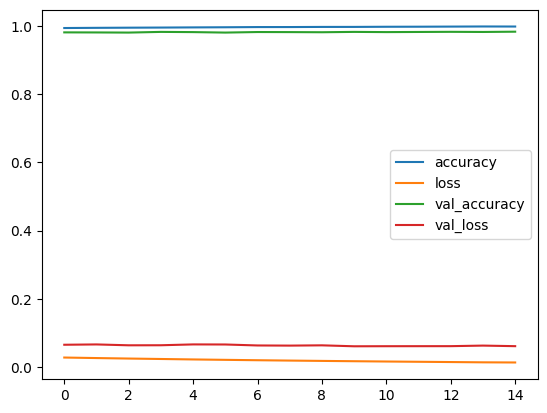

In [51]:
pd.DataFrame(history.history).plot()

In [52]:
# model_clf.evaluate(X_test, y_test)
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9728 - loss: 0.0842


[0.07028806209564209, 0.9772999882698059]

In [53]:
x_new = X_test[:3]
actual = y_test[:3]

In [54]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.001, 0.   , 0.001, 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [55]:
y_pred = np.argmax(y_prob,axis=-1)

In [56]:
y_pred

array([7, 2, 1])

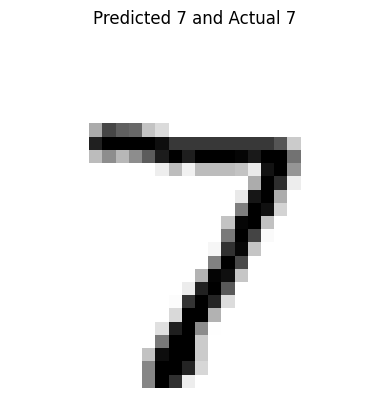

######################


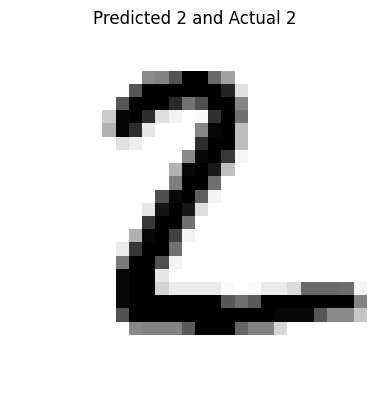

######################


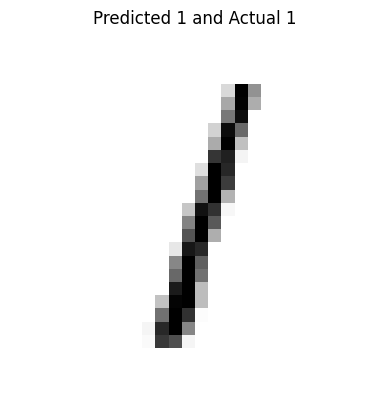

######################


In [57]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")

%tensorboard --logdir ={log_dir}